In [51]:
import pandas as pd

In [52]:
import numpy as np

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Formula: K − 273.15 =  °C
datos = pd.read_csv('TM.txt', header=0, delim_whitespace=True)


In [5]:
datos.head()

,País,TP,Tmin,Tmax,Lluvia(mm)
0,AFG,285.6,278.5,292.7,327
1,AGO,294.5,287.8,301.3,1010
2,AIA,298.6,294.7,302.5,1523
3,ALB,284.4,279.3,289.5,996
4,AND,280.6,275.9,285.3,973


In [12]:
temp_promedio = datos.iloc[:,1]
lluvias_mm = datos.iloc[:,4]

Text(0.5, 1.0, 'Relacion Entre Temperaturas Y Lluvias ')

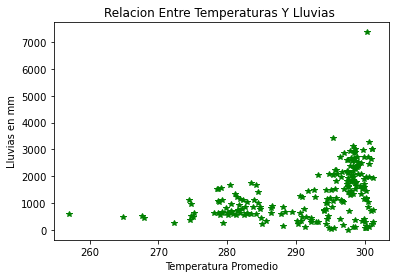

In [36]:
plt.plot(temp_promedio,lluvias_mm,'g*')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Lluvias en mm')
plt.title('Relacion Entre Temperaturas Y Lluvias ')

In [14]:
#Estadisticas descriptivas sobre las precipitaciones
lluvias_mm.describe()

count     215.000000
mean     1318.288372
std       945.572343
min         0.000000
25%       604.000000
50%      1130.000000
75%      1968.000000
max      7369.000000
Name: Lluvia(mm), dtype: float64

In [15]:
#Estadisticas descriptivas sobre las temperaturas
temp_promedio.describe()

count    215.000000
mean     291.929767
std        8.689630
min      257.000000
25%      284.450000
50%      295.600000
75%      298.600000
max      301.200000
Name: TP, dtype: float64

In [40]:
nuevos_datos= datos.assign(TminC= datos['Tmin']-273.15)


In [41]:
nuevos_datos.head()

,País,TP,Tmin,Tmax,Lluvia(mm),TPC,TmaxC,TminC
0,AFG,285.6,278.5,292.7,327,12.45,19.55,5.35
1,AGO,294.5,287.8,301.3,1010,21.35,28.15,14.65
2,AIA,298.6,294.7,302.5,1523,25.45,29.35,21.55
3,ALB,284.4,279.3,289.5,996,11.25,16.35,6.15
4,AND,280.6,275.9,285.3,973,7.45,12.15,2.75


In [28]:
nuevos_datos= datos.insert(5,'TmaxC', datos['Tmax']-273.15)


In [42]:
nuevos_datos.head()

,País,TP,Tmin,Tmax,Lluvia(mm),TPC,TmaxC,TminC
0,AFG,285.6,278.5,292.7,327,12.45,19.55,5.35
1,AGO,294.5,287.8,301.3,1010,21.35,28.15,14.65
2,AIA,298.6,294.7,302.5,1523,25.45,29.35,21.55
3,ALB,284.4,279.3,289.5,996,11.25,16.35,6.15
4,AND,280.6,275.9,285.3,973,7.45,12.15,2.75


In [38]:
nuevos_datos= datos.insert(5,'TPC', datos['TP']-273.15)


In [44]:
nuevos_datos['TPC'].min()

-16.149999999999977

In [43]:
nuevos_datos['TPC'].max()

28.05000000000001

In [45]:
nuevos_datos['TPC'].count()

215

In [81]:
paises = list(nuevos_datos['País'])
temp_prom_C = list(nuevos_datos['TPC'])
temp_mean = np.mean(temp_prom_C)
temp_max = max(temp_prom_C)


[Text(0.5, 0, 'Temperaturas Grados Centigrados'),
 Text(0, 0.5, 'Primeros Diez Paises'),
 Text(0.5, 1.0, 'Comparativa De Temperaturas')]

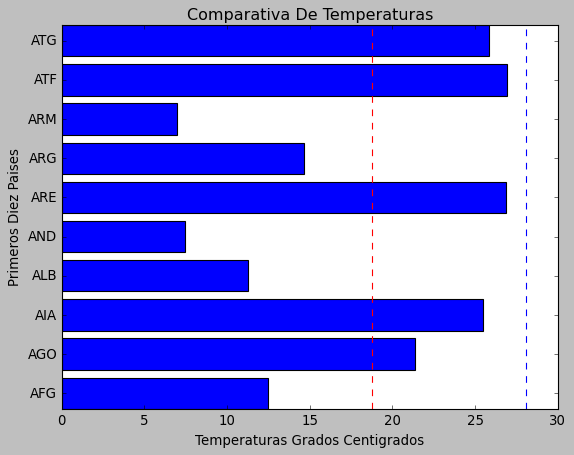

In [94]:
fig, ax = plt.subplots()
ax.barh(paises[0:10], temp_prom_C[0:10])
plt.style.use('classic')
ax.axvline(temp_mean, ls='--', color='r')

ax.axvline(temp_max, ls='--', color='b')


ax.set(xlabel='Temperaturas Grados Centigrados', ylabel='Primeros Diez Paises',
       title='Comparativa De Temperaturas')




In [95]:
nuevos_datos.to_csv('comparativa_clima_mundial') 